In [1]:
import exclusionprocess as ep
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import RMT

binno = 100
Lower = 0
Upper = 5

Generate: 
- Exponential plot
- Implicit formula
- Exclusion process

Exponential:

Mean after normalization: 1.0


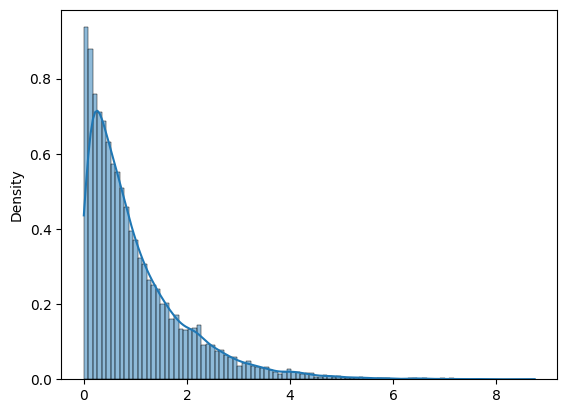

In [2]:
# Generate random exponential samples
Exp = np.random.exponential(scale=1.0, size=10000)

# Normalize to have mean = 1
Exp /= np.mean(Exp)
print(f"Mean after normalization: {np.mean(Exp)}")

sns.histplot(data=Exp, bins=binno, kde=True, stat="density")

# Area under the histogram of exponential samples should be 1
hist_exp, expbins = np.histogram(Exp, range=(Lower, Upper), bins=binno, density=True)
# Area under the histogram should be 1
bin_width = np.diff(expbins)[0]
HistArea = np.sum(hist_exp * bin_width)
hist = hist_exp / HistArea
HistAreaTest = np.sum(hist_exp * bin_width)
assert np.isclose(HistAreaTest, 1), f"Histogram area is not 1. Area is {HistAreaTest}."

# ThinnedDict[0.00] = hist_exp
# ThinnedDict["Bins"] = bins[:-1]  # Store bin edges for reference

# # Save to file
# p = 0.00
# filename = f"ThinnedEigenvalues/Thin_{p:.2f}.csv"
# np.savetxt(filename, hist, delimiter=",")
# print(f"Saved normalized exponential samples to {filename}.")

Implicit Formula:

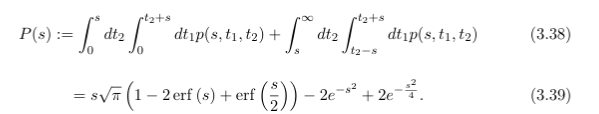

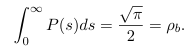

Area under ImpSim before scaling: 0.7849885130955321
Area under ImpSim after scaling: 0.9999999999999998


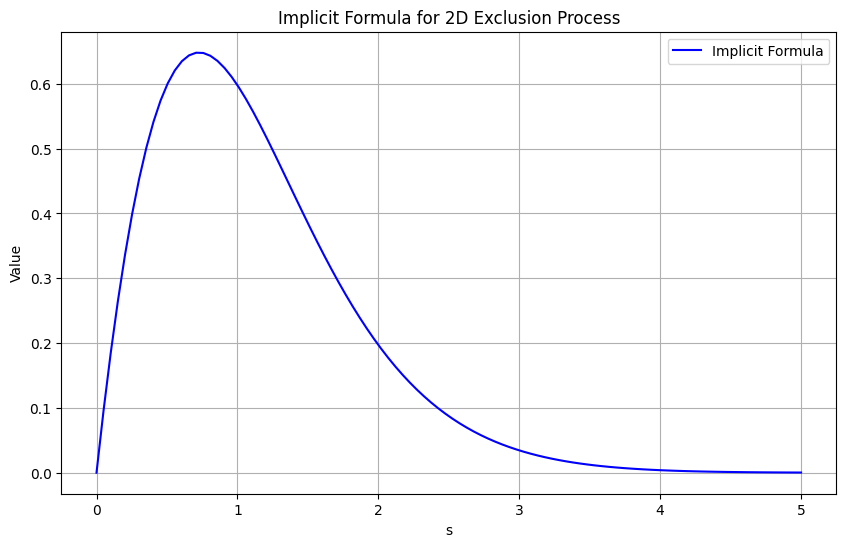

In [3]:
from scipy import special
import math

def implicit_form(s):
    """
    Implicit formula for the exclusion process.
    """
    brack = 1-2*special.erf(s) + special.erf(s/2)
    brack = brack*s*math.sqrt(np.pi)
    expdiff = 2*np.exp(-s**2 /4) - 2*np.exp(-s**2)
    const = math.sqrt(np.pi)/2

    return const * (brack + expdiff)

# Plot the implicit formula
s = np.linspace(Lower, Upper, binno)
ImpSim = implicit_form(s)
print(f"Area under ImpSim before scaling: {np.trapezoid(ImpSim, s)}")
ImpSim /= np.trapezoid(ImpSim, s)  # Normalize to have area = 1
print(f"Area under ImpSim after scaling: {np.trapezoid(ImpSim, s)}")

plt.figure(figsize=(10, 6))
plt.plot(s, ImpSim, label='Implicit Formula', color='blue')
plt.title('Implicit Formula for 2D Exclusion Process')
plt.xlabel('s')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()

Exclusion Process:

In [4]:
Samples=10000 #Number of times you sample the point process
lam=1   #Intensity of points
L=50   #Finite length (x-axis) of exclusion area
H=10   #Finite height (y-axis) of exclusion area
v=1     #Replication fork speed, recommend keeping this as 1 all the time

In [5]:
from tqdm import tqdm
import numpy as np  # Assuming you're using NumPy

TempList = []

for j in tqdm(range(Samples), desc="Processing samples"):
    #print(f"Sample {j+1}/{Samples}")
    PPP = ep.TDPPP(lam, L, H)
    Active, NoActive2, N = ep.AlgoTwo(PPP, 1)
    
    if len(Active) > 0:
        #print(f"Active points: {len(Active)} for run {j+1}")
        Active = np.sort(Active)
        Dist = np.diff(Active)
        TempList.append(Dist)

AllDists = np.concatenate(TempList)
print(f"Total number of distances: {len(AllDists)}")
print(AllDists)


Processing samples: 100%|██████████| 10000/10000 [00:51<00:00, 195.66it/s]

Total number of distances: 435171
[0.42162606 1.11984207 0.10845654 ... 0.74900441 1.32151936 1.71428635]


In [6]:
SimHist, SimBins = np.histogram(AllDists, bins=binno, range=(Lower, Upper), density=True)
bin_width = np.diff(SimBins)[0]
SimHist = SimHist / np.sum(SimHist * bin_width)  # Normalize the histogram
assert np.isclose(np.sum(SimHist * bin_width), 1), "Area under the simulated histogram is not 1"

# Shift SimBins to match the histogram centers
SimBins = SimBins[:-1] + bin_width / 2

Do the following plots:

- Simulated exclusion vs implicit

For each DNA data:
- Data vs Exclusion
- Data vs Exclusion vs Exp

In [7]:
# Check if a folder exists called SimPlots
if not os.path.exists("SimPlots"):
    os.makedirs("SimPlots")

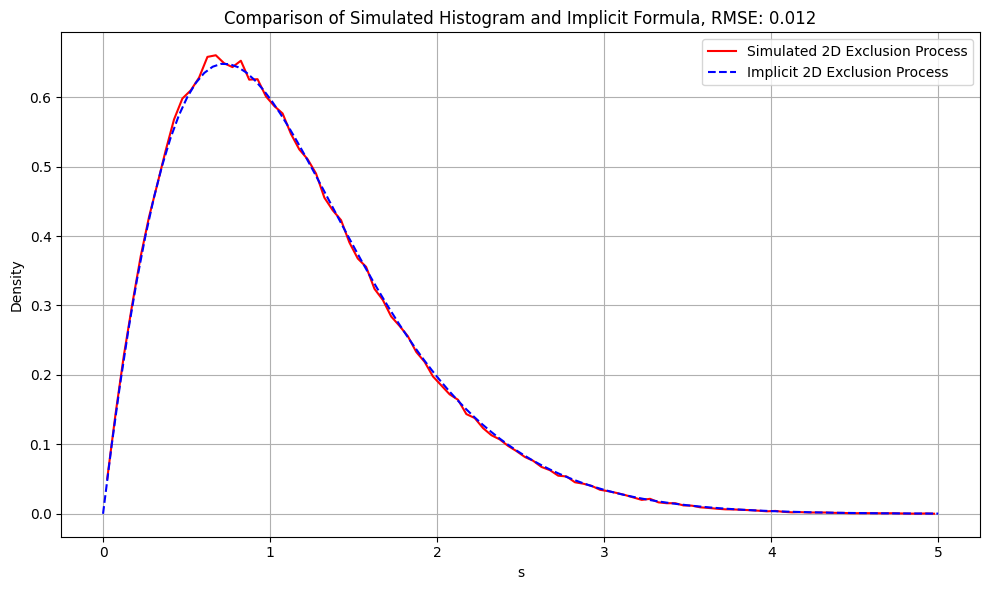

In [9]:
# Plot SimHist and ImpSim

RMSESimImp = np.sqrt(np.mean((SimHist - ImpSim) ** 2))
plt.figure(figsize=(10, 6))
plt.plot(SimBins, SimHist, label='Simulated 2D Exclusion Process', color='red')
plt.plot(s, ImpSim, label='Implicit 2D Exclusion Process', color='blue', linestyle='--')
plt.title(f'Comparison of Simulated Histogram and Implicit Formula, RMSE: {RMSESimImp:.3f}')
plt.xlabel('s')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("SimPlots/Simulated_vs_Implicit_Exclusion_Process.png")
plt.show()

arabidopsis_Interorigin_spacing.csv
Extracting File:  arabidopsis
1.0


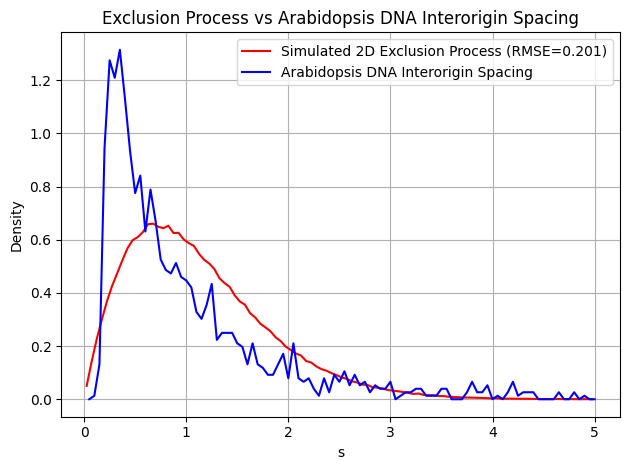

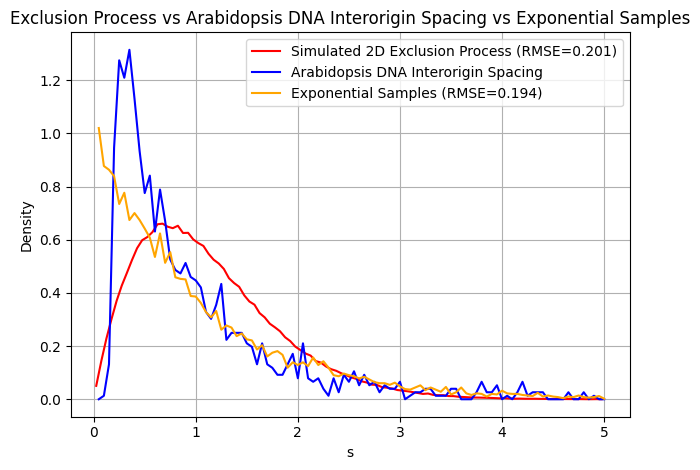

candida_CBS138_Interorigin_spacing.csv
Extracting File:  candida_CBS138
1.0


C:\Users\hd15639\AppData\Local\Temp\ipykernel_67564\1935895165.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ErrorFrame = pd.concat([ErrorFrame, Tempdf], ignore_index=True)


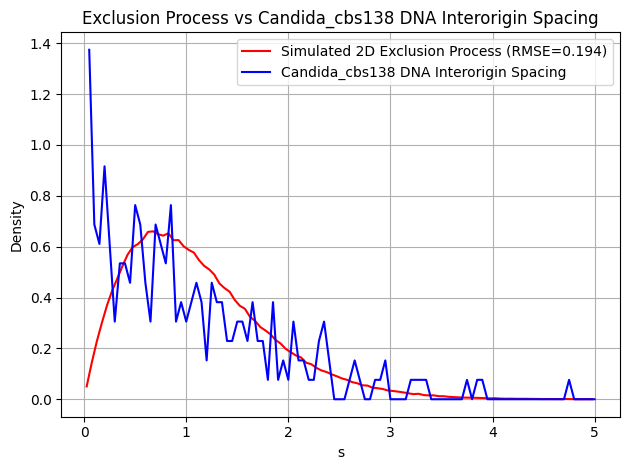

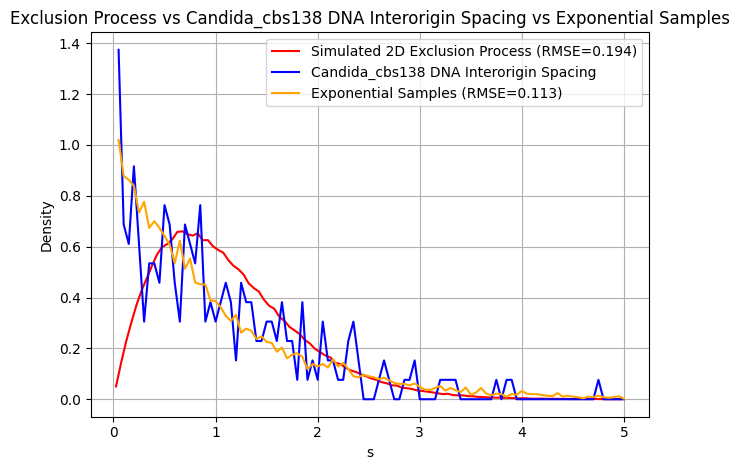

drosophila_Kc_Interorigin_spacing.csv
Extracting File:  drosophila_Kc
1.0


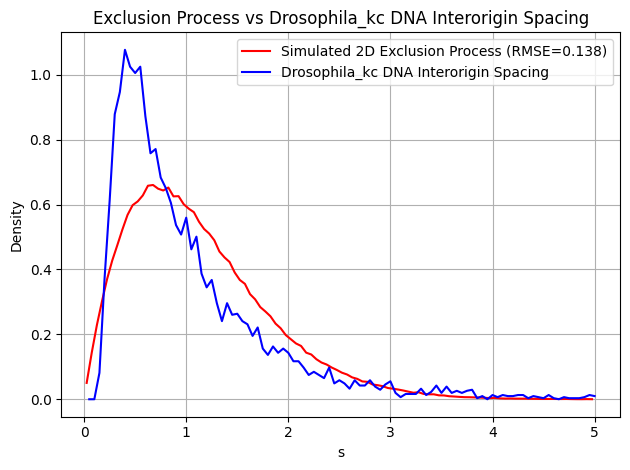

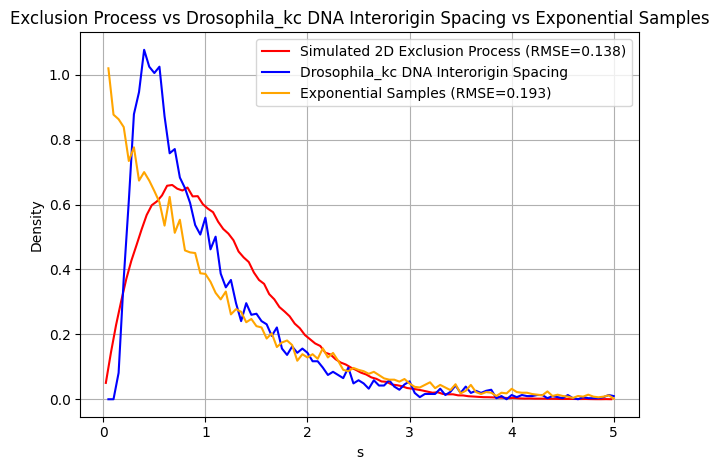

drosophila_S2_Interorigin_spacing.csv
Extracting File:  drosophila_S2
1.0


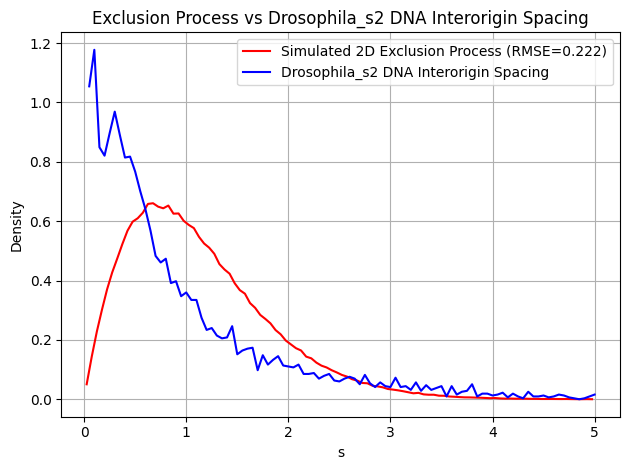

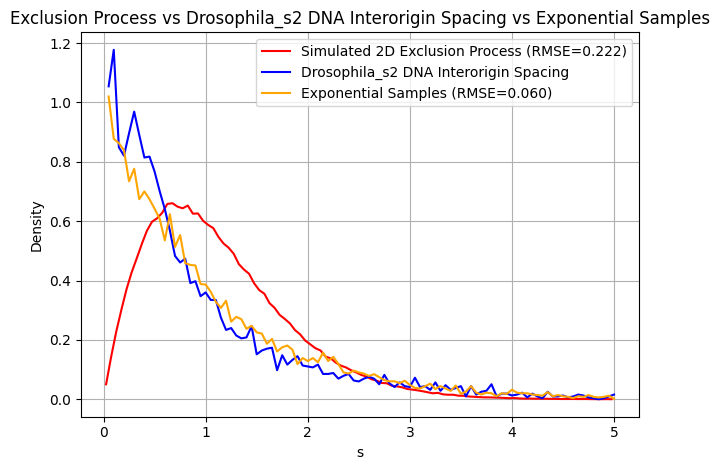

human_K562_Interorigin_spacing.csv
Extracting File:  human_K562
1.0


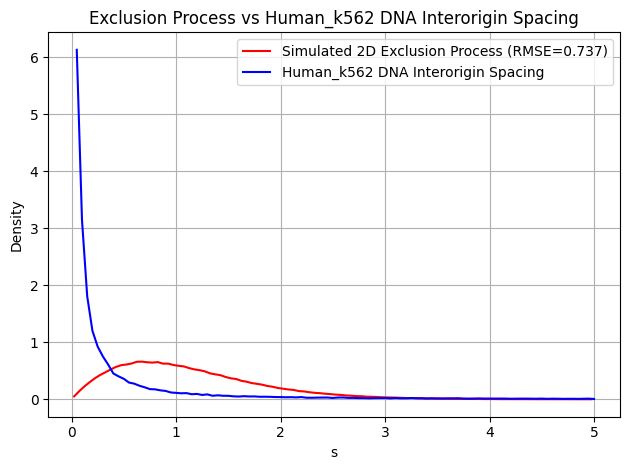

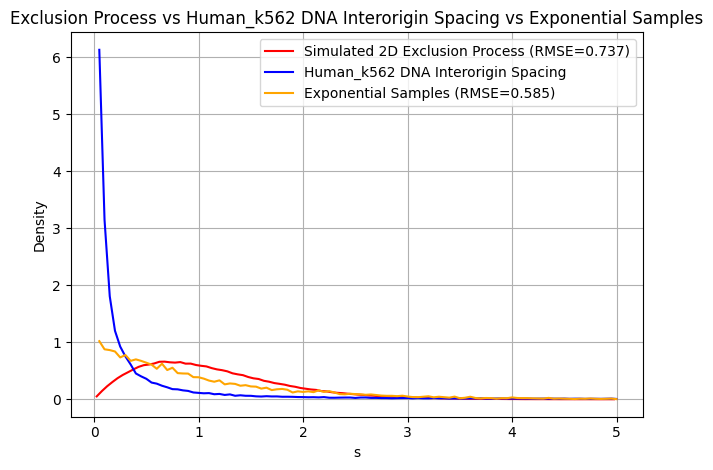

human_MCF7_Interorigin_spacing.csv
Extracting File:  human_MCF7
0.9999999999999997


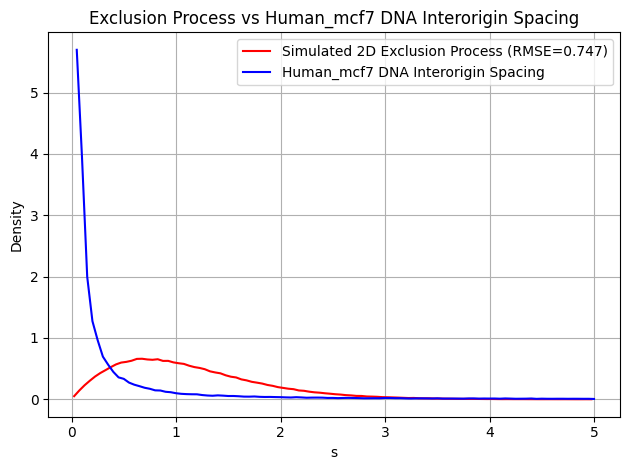

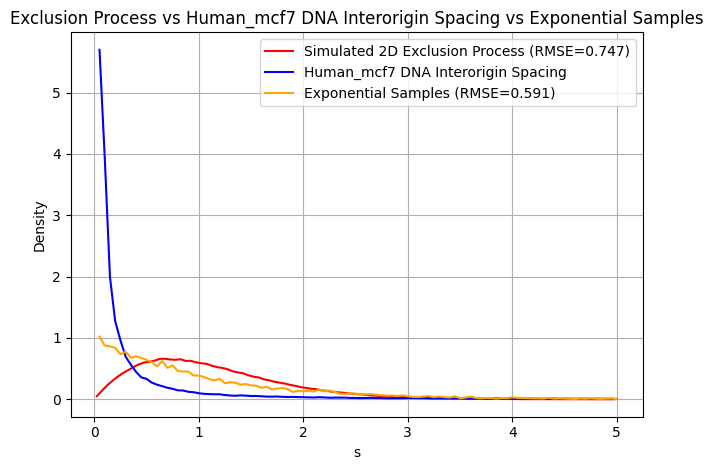

k_lactis_Interorigin_spacing.csv
Extracting File:  k_lactis
1.0


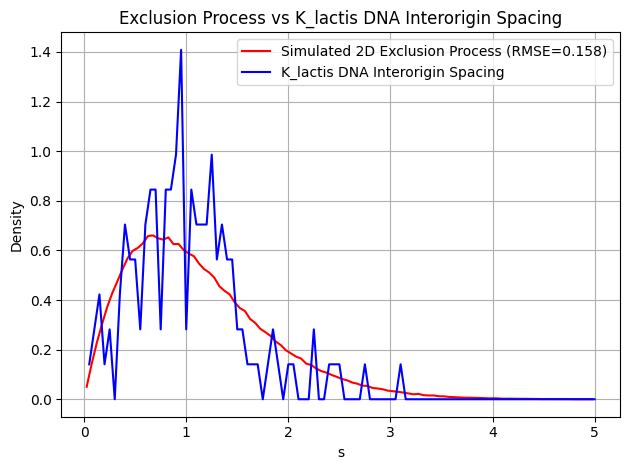

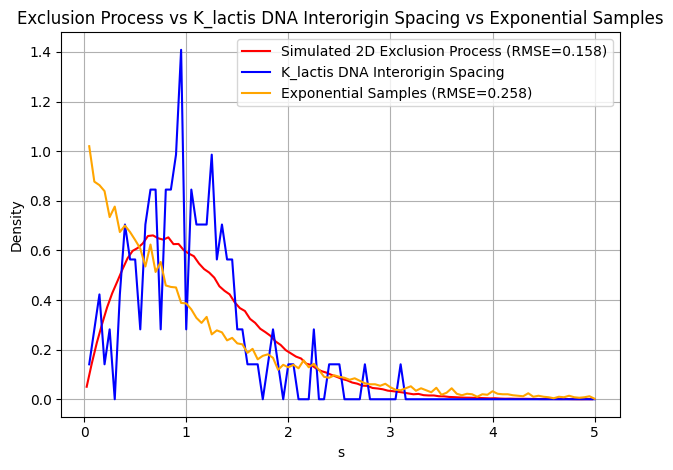

L_waltii_Interorigin_spacing.csv
Extracting File:  L_waltii
1.0


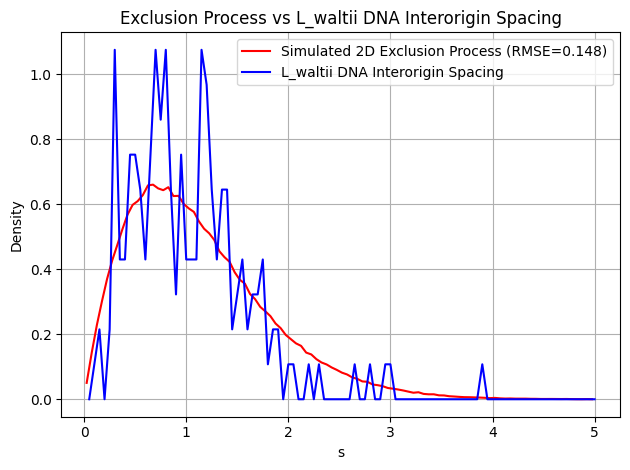

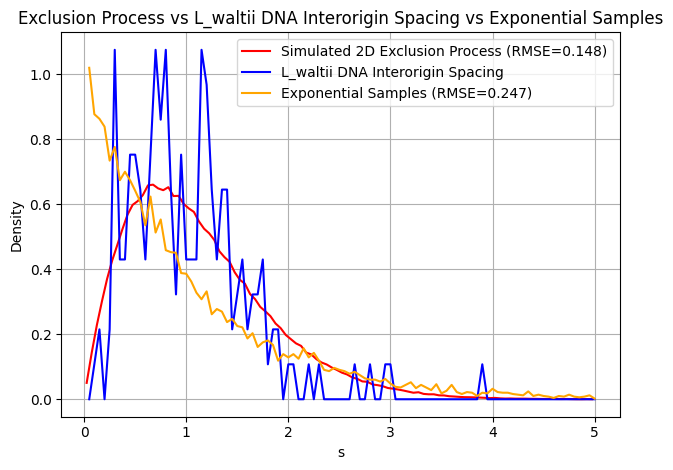

mouse_ES1_Interorigin_spacing.csv
Extracting File:  mouse_ES1
1.0


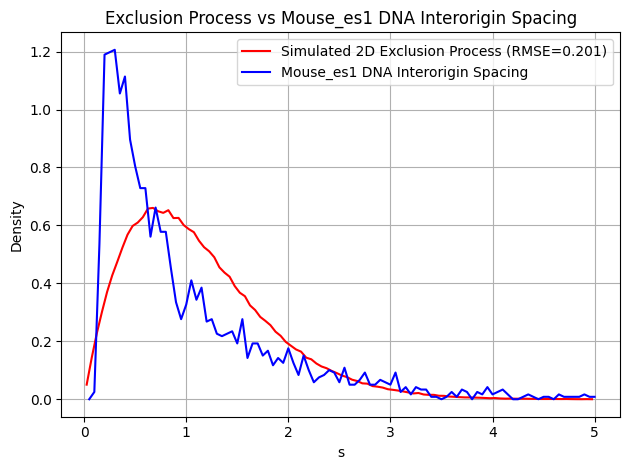

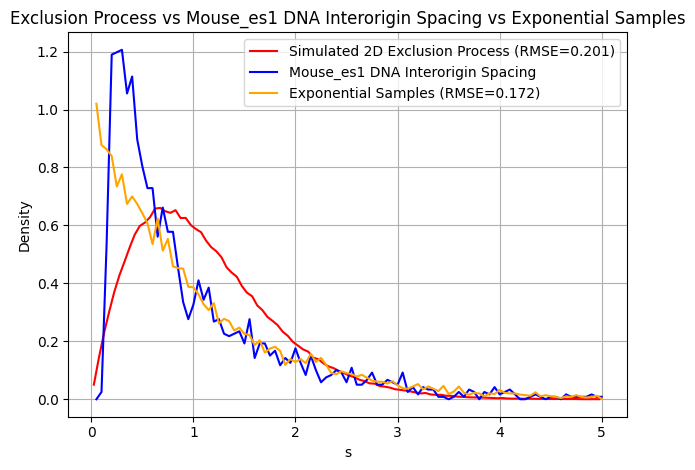

mouse_MEF_Interorigin_spacing.csv
Extracting File:  mouse_MEF
1.0


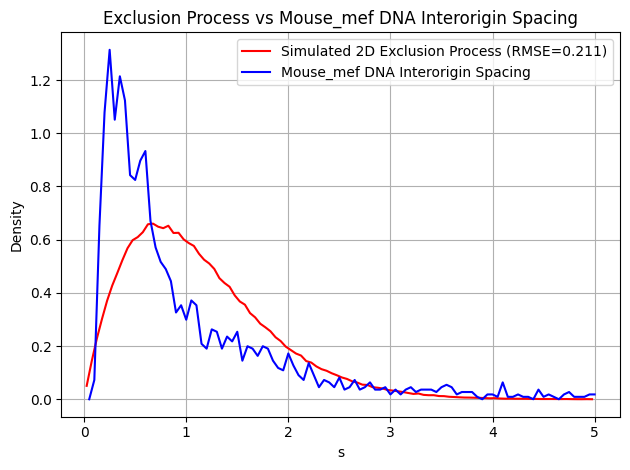

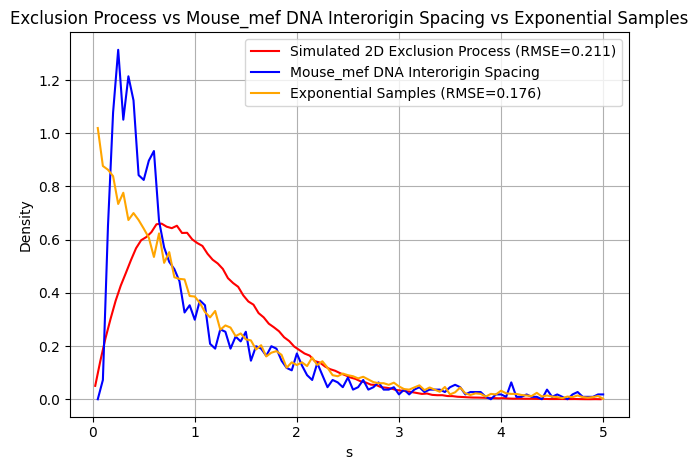

mouse_P19_Interorigin_spacing.csv
Extracting File:  mouse_P19
1.0000000000000002


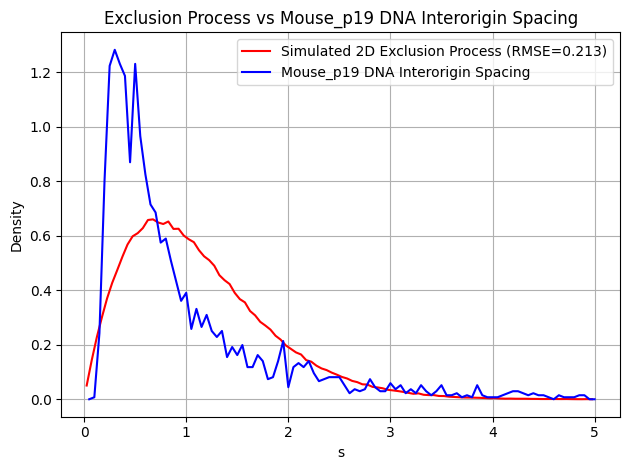

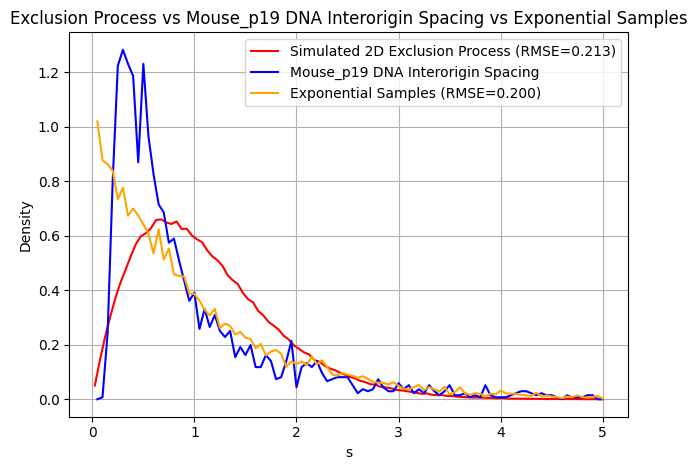

s_cerevisiae_Interorigin_spacing.csv
Extracting File:  s_cerevisiae
1.0


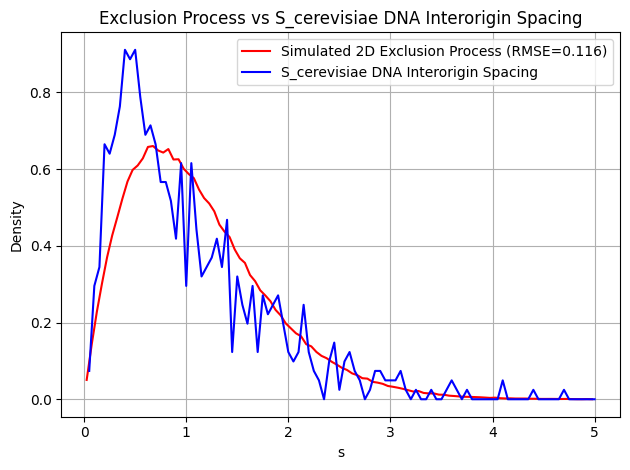

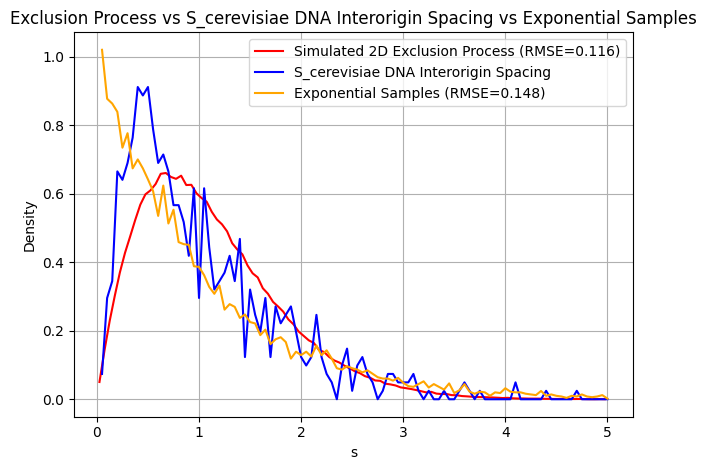

,Sample,SimRMSE,ExpRMSE
0,arabidopsis,0.200627,0.193659
1,candida_CBS138,0.193519,0.112725
2,drosophila_Kc,0.137623,0.193452
3,drosophila_S2,0.221760,0.059907
4,human_K562,0.737145,0.585278
5,human_MCF7,0.746649,0.591299
6,k_lactis,0.158090,0.257817
7,L_waltii,0.147543,0.247439
8,mouse_ES1,0.201429,0.172302
9,mouse_MEF,0.211140,0.175883


In [11]:
ErrorFrame = pd.DataFrame(columns=["Sample", "SimRMSE", "ExpRMSE"])

for filename in os.listdir('processeddata'):
    print(filename)
    name = filename.split('_Interorigin')[0]
    print("Extracting File: ", name)
    dna = RMT.file_extractor(name, "Interorigin_spacing")

    dnahist, dnabins = RMT.dna_histogram(dna, Lower=Lower, Upper=Upper, binno=binno)

    RMSESimDNA = np.sqrt(np.mean((SimHist - dnahist) ** 2))
    # Plot DNA vs Simulated histogram
    plt.plot(SimBins, SimHist, label=f'Simulated 2D Exclusion Process (RMSE={RMSESimDNA:.3f})', color='red')
    plt.plot(dnabins[1:], dnahist, label=f'{name.capitalize()} DNA Interorigin Spacing', color='blue')
    plt.title(f'Exclusion Process vs {name.capitalize()} DNA Interorigin Spacing')
    plt.xlabel('s')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"SimPlots/{name}vsSimulatedExclusion.png")
    plt.show()

    ExpRMSE = np.sqrt(np.mean((hist_exp - dnahist) ** 2))
    # Plot DNA vs Simulated histogram vs Exp
    plt.plot(SimBins, SimHist, label=f'Simulated 2D Exclusion Process (RMSE={RMSESimDNA:.3f})', color='red')
    plt.plot(dnabins[1:], dnahist, label=f'{name.capitalize()} DNA Interorigin Spacing', color='blue')
    plt.plot(expbins[1:], hist_exp, label=f'Exponential Samples (RMSE={ExpRMSE:.3f})', color='orange')
    plt.title(f'Exclusion Process vs {name.capitalize()} DNA Interorigin Spacing vs Exponential Samples')
    plt.xlabel('s')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"SimPlots/{name}vsSimulatedExclusionvsExp.png")
    plt.show()

    Tempdf = pd.DataFrame({
        "Sample": [name],
        "SimRMSE": [RMSESimDNA],
        "ExpRMSE": [ExpRMSE]
    })
    ErrorFrame = pd.concat([ErrorFrame, Tempdf], ignore_index=True)

ErrorFrame

    

In [12]:
ErrorFrame.to_csv("SimPlots/ErrorFrame.csv", index=False)
print("ErrorFrame saved to SimPlots/ErrorFrame.csv")

ErrorFrame saved to SimPlots/ErrorFrame.csv
